# LSE Machine Learning: Practical Applications

## Module 4 Unit 2 IDE Activity (Assessment) | Apply shrinkage methods in R

### In this IDE notebook, you are required to complete different steps to apply ridge regression and the lasso methods to a data set to improve the regression model's interpretability and prediction accuracy.
The instructions for this IDE activity are positioned as text cells before each step. You are required to read the text cells above a code cell, familiarise yourself with the required step, and execute the step. You are encouraged to refer back to the practice IDE activity to familiarise yourself with the different steps and how they are executed in R.

### Step 1: Load and install the packages

To execute ridge regression and the lasso on the Boston housing data set, the tidyverse, glmnet, caret, ISLR, and psych packages are installed.

In [1]:
# Set the seed and load the packages
set.seed(123)
library(tidyverse)
library(glmnet)
library(caret)     
library(ISLR)
library(psych)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-3

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




### Step 2: Load and prepare the data

In [4]:
# Load and prepare the data
house <- read.csv("BostonHousing.csv")
house=na.omit(house)         # Make sure that there are no NA values

In [5]:
# Split the data into separate predicted and predictor values
# Transform the categoricals using the model.matrix method and scale the predicted data
y <- house %>% select(medv) %>% scale(center = TRUE, scale = FALSE) %>% as.matrix()
x <- model.matrix( ~ . - 1, select(house,-c(medv)))

The data is now ready to be used for the different shrinkage methods.

### Step 3: Execute shrinkage methods

#### Section A: Ridge regression

1. By making use of the ```cv.glmnet``` function, estimate the performance of the model across various values of the shrinkage estimator, lambda.

**Note:** Add the *x* and *y* parameters and set the family to Gaussian, as it is a regression problem with Gaussian errors (specifically, *y* is Gaussian). The Gaussian family is the default, so this parameter is omitted. To fit ridge regression on the data, alpha is set to 0.

In [6]:
# Perform 10-fold cross-validation to select lambda
lambdas_to_try <- 10^seq(0, 10, length.out = 100)

# YOUR CODE HERE
ridge_cv <- cv.glmnet(x, y, alpha = 0, lambda = lambdas_to_try,
                      standardize = TRUE, nfolds = 10)

2. Plot the cross-validation results by making use of the `plot` function.

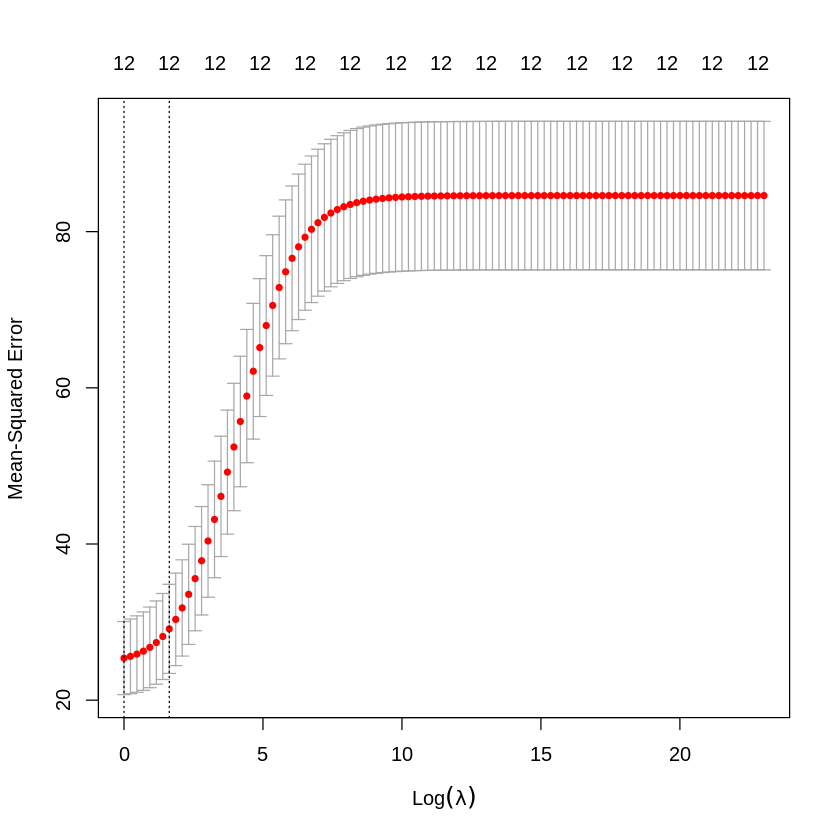

In [7]:
plot(ridge_cv)

3. Determine the best cross-validation lambda.

In [8]:
lambda_cv <- ridge_cv$lambda.min

# Fit final model, determine RSS, and determine multiple R-squared 
model_cv <- glmnet(x, y, alpha = 0, lambda = lambda_cv, standardize = TRUE)
y_hat_cv <- predict(model_cv, x)
ssr_cv <- t(y - y_hat_cv) %*% (y - y_hat_cv)
rsq_ridge_cv <- cor(y, y_hat_cv)^2

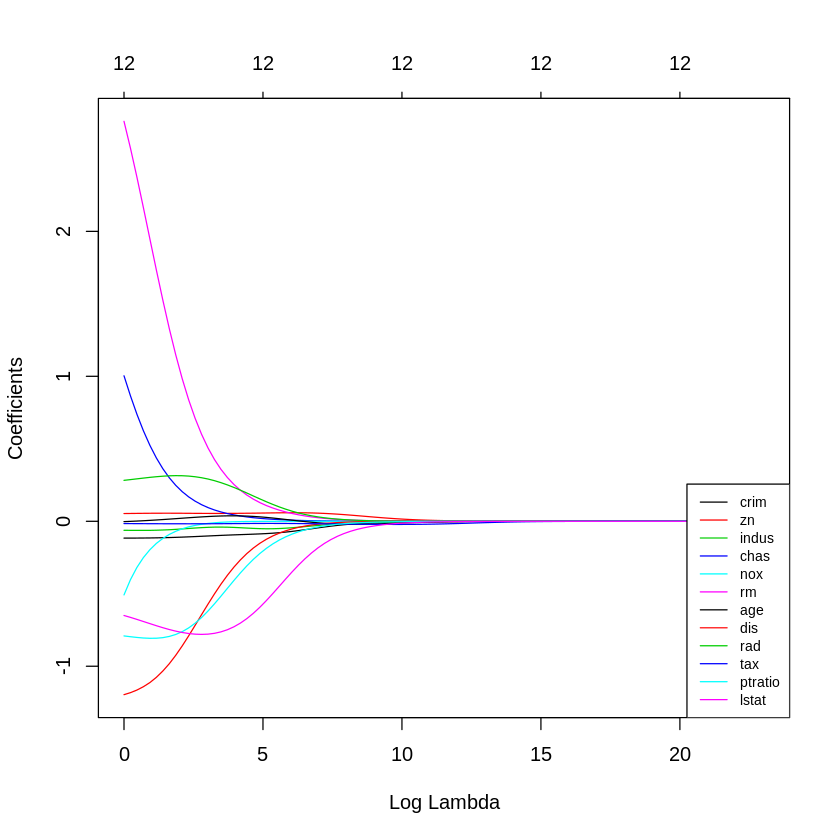

In [9]:
# See how increasing lambda shrinks the coefficients
# Lines represent coefficients per variable for different lambdas
# The higher the lambda, the more the coefficients shrink towards zero
res <- glmnet(x, y, alpha = 0, lambda = lambdas_to_try, standardize = FALSE)
plot(res, xvar = "lambda")
legend("bottomright", lwd = 1, col = 1:6, legend = colnames(x), cex = .7)

__Pause and reflect:__

Notice how increasing the lambda shrinks the coefficients towards zero.

#### Section B: The lasso

Recall that the ```cv.glmnet``` function is used to estimate the performance of the model across various values of the shrinkage estimator, lambda.

**Note:** Add the *x* and *y* parameters and set the family to Gaussian, as it is a regression problem with Gaussian errors (specifically, *y* is Gaussian). The Gaussian family is the default, so this parameter is omitted. To fit the lasso model, alpha is set to 1.

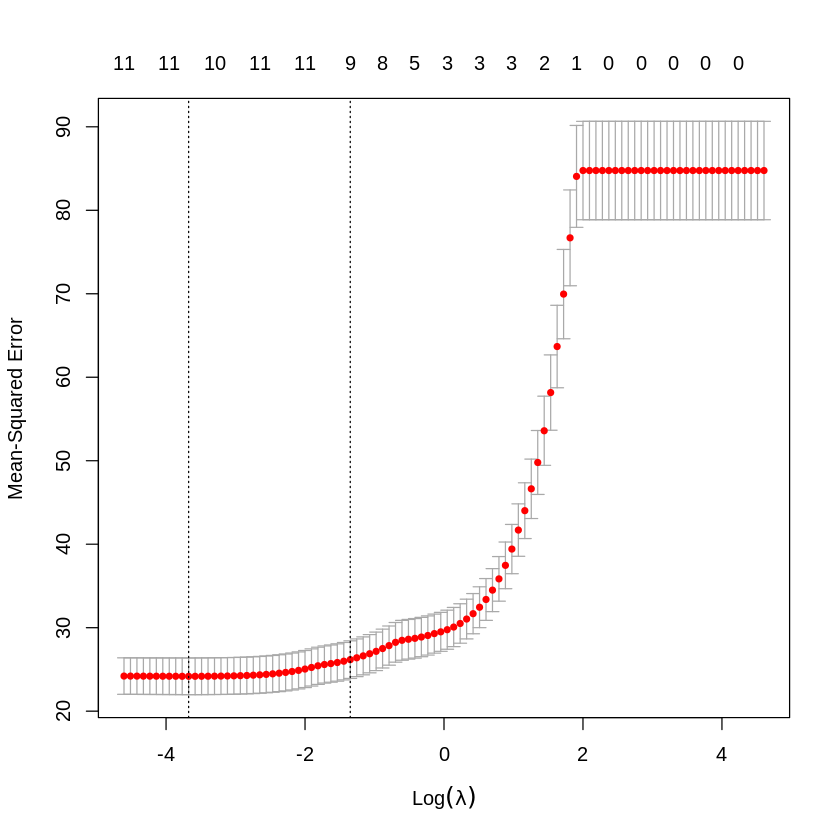

In [10]:
# Perform 10-fold cross-validation to select lambda
lambdas_to_try <- 10^seq(-2, 2, length.out = 100)

# The lasso is similar to ridge regression, but set alpha = 1 instead of 0
lasso_cv <- cv.glmnet(x, y, alpha = 1, lambda = lambdas_to_try,
                      standardize = TRUE, nfolds = 10)
# Plot cross-validation results
plot(lasso_cv)

This plot shows the mean cross-validated error curve and upper and lower standard deviation curves. From this plot, you are able to find the number of variables that provide the minimum cross-validated error and also the smallest number of variables such that error is within one standard error of the minimum.

1. After the cross-validated lambda is determined, fit the final model and calculate the RSS and multiple R-squared values.

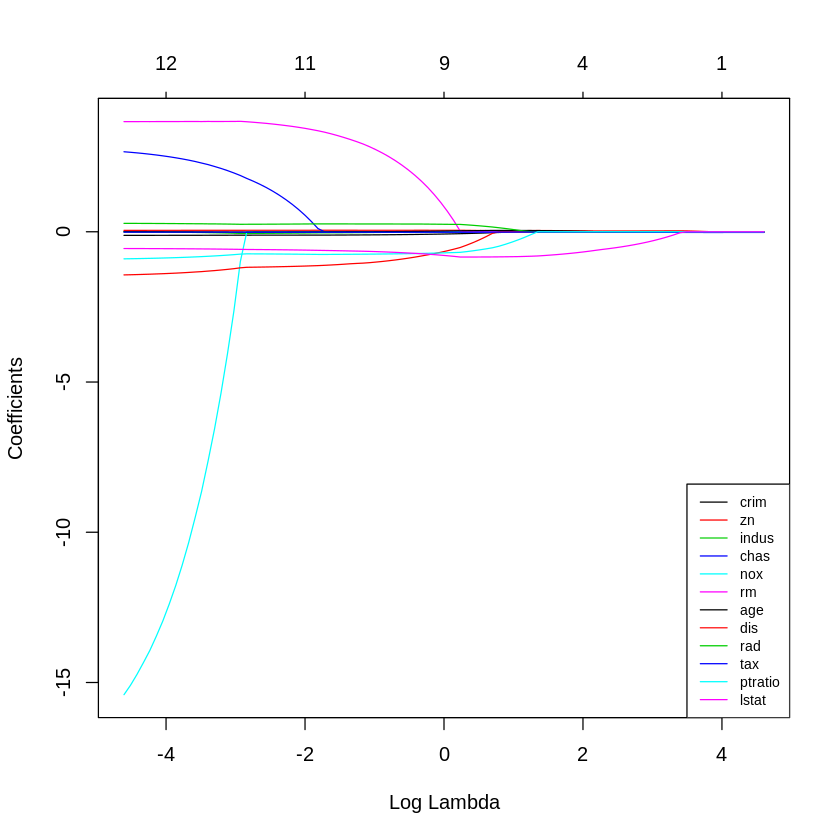

In [11]:
# Best cross-validated lambda
lambda_cv <- lasso_cv$lambda.min

# Fit final model, determine RSS, and determine multiple R-squared
# YOUR CODE HERE
model_cv2 <- glmnet(x, y, alpha = 1, lambda = lambda_cv, standardize = TRUE)
y_hat_cv2 <- predict(model_cv2, x)
ssr_cv2 <- t(y - y_hat_cv2) %*% (y - y_hat_cv2)
rsq_lasso_cv2 <- cor(y, y_hat_cv2)^2


# See how increasing lambda shrinks the coefficients
# The higher the lambda, the more the coefficients shrink towards zero
res2 <- glmnet(x, y, alpha = 1, lambda = lambdas_to_try, standardize = FALSE)
plot(res2, xvar = "lambda")
legend("bottomright", lwd = 1, col = 1:6, legend = colnames(x), cex = .7)

Once the estimation is complete, the R-squared values are calculated, and the coefficient and MSE plots for the two models are repeated for easier comparison.

2. Calculate the R-squared value for the different models for comparison.

In [12]:
# Calculate R-squared for the different models
rsq <- cbind("R-squared" = c(rsq_ridge_cv, rsq_lasso_cv2))
rownames(rsq) <- c("ridge cross-validated", "lasso cross_validated")
print(rsq)

                      R-squared
ridge cross-validated 0.7266572
lasso cross_validated 0.7339652


3. Generate the MSE plots for the two models (ridge regression and the lasso) to enable a comparison between the two models.

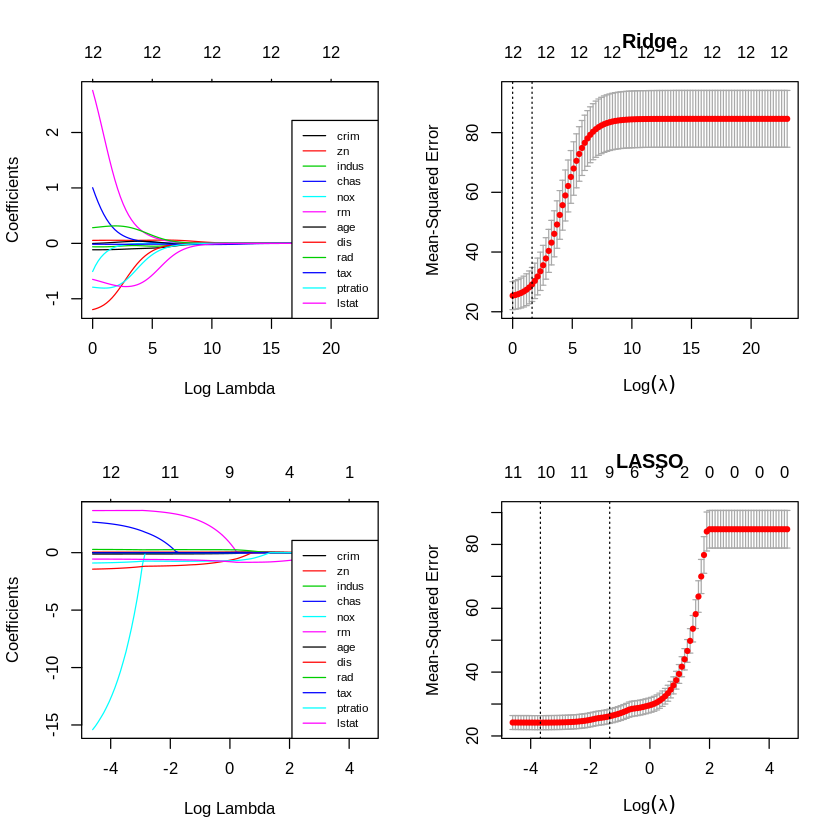

In [13]:
# Repeat the plots of solution paths for comparison
par(mfrow=c(2,2))
# Ridge - left
plot(res, xvar = "lambda")
legend("bottomright", lwd = 1, col = 1:6, legend = colnames(x), cex = .7)

# Ridge - right
plot(ridge_cv, main="Ridge",cex=0.7)

# Lasso - left
plot(res2, xvar = "lambda")
legend("bottomright", lwd = 1, col = 1:6, legend = colnames(x), cex = .7)

# Lasso - right
plot(lasso_cv, main="LASSO",cex=0.7)

Notice that the top two plots are related to ridge regression, and the bottom two to the lasso. Think about the difference between ridge regression and the lasso, and decide which approach you would prefer.



**Pause and reflect:**

- Consider the top-left graph that plots the solution path for ridge regression estimated coefficients. Notice what happens to the estimated coefficients as lambda increases.
- Now consider the bottom-left graph that plots the solution path for the lasso estimates. Notice what happens to the coefficients as lambda increases. 
- Consider the top-right graph that plots the cross-validated error versus the log(Lambda). Notice how both the optimal lambda, which minimises the error, and the lambda selected by applying the one standard error rule, suggest that all 12 coefficients are non-zero.
- Consider the bottom-right graph that plots the cross-validated error versus the log(Lambda) for the lasso. Can you determine how many variables the optimal lambda suggests (the first dotted line), and how this differs from the variables suggested by lambda(1se), represented by the second dotted line?

#### Section C: Obtain coefficients and make predictions

1. Obtain the lambda at the local extrema, the minimum mean cross-validated error, and the most regularised model by making use of the `ridge_cv$lambda.min` function and the `ridge_cv$lambda.1se` function.

**Note:** This step is only relevant to ridge regression.

In [28]:
# Obtain the lambda 1 standard deviation away from the local extrema

#lambda_cv_rigde_min <- ridge_cv$lambda.min
lambda_cv_rigde_se <- ridge_cv$lambda.1se
print(lambda_cv_rigde_se)
#my_rigde_lam <- cbind("Lambda/Rigde Reg" = c(lambda_cv_rigde_min, lambda_cv_rigde_se))
#rownames(my_rigde_lam) <- c("min", "1se")
#print(my_rigde_lam)

# Display the model coefficients for (min and) 1se
#coef(ridge_cv, s="lambda.min")
coef(ridge_cv, s="lambda.1se")

# Predict using the cross-validated model - min
#predict(ridge_cv, newx = x[1:10,], s = "lambda.min")

# Predict using the model fitted on all the data - min
#predict(model_cv, newx = x[1:10,], s = "lambda.min")

# Predict using the cross-validated model - 1se
predict(ridge_cv, newx = x[1:10,], s = "lambda.1se")

# Predict using the model fitted on all the data - 1se
predict(model_cv, newx = x[1:10,], s = "lambda.1se")

[1] 5.094138


13 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept)  1.441491754
crim        -0.073822504
zn           0.019253772
indus       -0.075225924
chas         2.744129711
nox         -5.268046617
rm           3.404890083
age         -0.008158996
dis         -0.428445270
rad          0.011420036
tax         -0.003169224
ptratio     -0.631110376
lstat       -0.332267561

,lambda.1se
1,6.6451053
2,2.5130361
3,6.9574910
4,6.2708239
5,5.9127896
6,3.4775339
7,1.2161098
8,-0.8838830
9,-6.4008996
10,-0.9683065


,s1
1,7.6722752
2,2.5097303
3,7.9828690
4,6.5707230
5,5.9951274
6,3.2254802
7,0.5847586
8,-2.4602209
9,-9.8301778
10,-2.7693616


2. Repeat the above steps to obtain the same values for the lasso.



In [29]:
lambda_cv_lasso_se <- lasso_cv$lambda.1se
print(lambda_cv_lasso_se)

# Display the model coefficients (for 1se)
coef(lasso_cv, s="lambda.1se")

# Predict using the cross-validated model
predict(lasso_cv, newx = x[1:10,], s = "lambda.1se")
# Predict using the model fitted on all the data
predict(model_cv2, newx = x[1:10,], s = "lambda.1se")

[1] 0.2595024


13 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  3.4142983862
crim        -0.0485420829
zn           0.0080174725
indus        .           
chas         2.3679472743
nox         -8.7190096317
rm           4.1315825590
age          .           
dis         -0.6538804828
rad          .           
tax         -0.0001107866
ptratio     -0.8276532544
lstat       -0.5391081216

,lambda.1se
1,7.9776170
2,2.9182725
3,8.8296451
4,7.2815928
5,6.6069497
6,3.7112008
7,0.8287438
8,-2.3907539
9,-10.5268136
10,-2.4004552


,s1
1,7.6258193
2,2.4812382
3,8.1219866
4,6.2739652
5,5.5225055
6,2.9147221
7,0.2672277
8,-3.3645923
9,-11.4611102
10,-3.7931952


__Pause and reflect:__

Notice how the two methods reduce the coefficients towards zero, or to exactly zero, depending on the particular model observed.

**Note:** Remember to submit this IDE notebook after completion and navigate to the next component to share your thoughts and reflections about your findings in this IDE activity with your peers in the small group discussion forum.